# GRAY CONVERSION

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def resize_and_grayscale(input_folder, output_folder, target_size=(128, 128)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each frame in the input folder
    for frame_file in sorted(os.listdir(input_folder)):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)
        
        # Convert the frame to grayscale
        frame_gray = frame.convert('L')  # 'L' mode for grayscale
        
        # Resize the frame to the target size
        frame_resized = frame_gray.resize(target_size)
        
        frame_array = np.array(frame_resized) / 255.0  # Normalize pixel values to range [0, 1]
        
        output_frame_path = os.path.join(output_folder, frame_file)
        Image.fromarray((frame_array * 255).astype(np.uint8)).save(output_frame_path)  # Convert back to uint8 and save
        
    print(f"Resizing and grayscale conversion completed. Frames saved in {output_folder}.")

# Define input and output paths
input_folder = 'Report'  # Replace with your input frames folder
output_folder = 'Gray'  # Replace with your desired output folder
target_size = (244, 244)  # Resize to 128x128 resolution

# Call the function to resize and convert to grayscale
resize_and_grayscale(input_folder, output_folder, target_size)

Resizing and grayscale conversion completed. Frames saved in Gray.


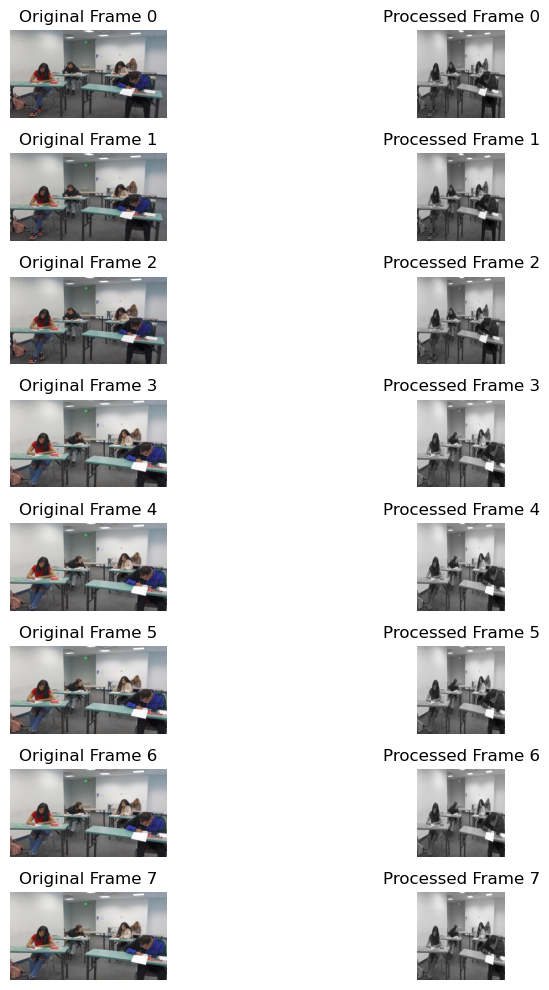

In [4]:
def plot_images_comparison(input_folder, output_folder, num_images=8):
    fig, axs = plt.subplots(num_images, 2, figsize=(10, 10))
    for i, frame_file in enumerate(sorted(os.listdir(input_folder))[:num_images]):
        # Original frame
        original_frame_path = os.path.join(input_folder, frame_file)
        original_frame = Image.open(original_frame_path)
        
        # Processed frame
        processed_frame_path = os.path.join(output_folder, frame_file)
        processed_frame = Image.open(processed_frame_path)
        
        axs[i, 0].imshow(original_frame, cmap='gray')
        axs[i, 0].set_title(f"Original Frame {i}")
        axs[i, 0].axis('off')
        
        axs[i, 1].imshow(processed_frame, cmap='gray')
        axs[i, 1].set_title(f"Processed Frame {i}")
        axs[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to visualize comparison
plot_images_comparison(input_folder, output_folder)

# Normalization

In [5]:
import numpy as np
from PIL import Image

def normalize_frame(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for frame_file in sorted(os.listdir(input_folder)):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)
        frame_array = np.array(frame) / 255.0  # Normalize pixel values to range [0, 1]
        
        output_frame_path = os.path.join(output_folder, frame_file)
        Image.fromarray((frame_array * 255).astype(np.uint8)).save(output_frame_path)  # Convert back to uint8 and save
        
    print(f"Normalization completed. Frames saved in {output_folder}.")

# Define input and output paths
input_folder = 'Gray'  # Replace with your resized frames folder
output_folder = 'normalized_frames'  # Replace with your desired output folder

# Call the function to normalize the frames
normalize_frame(input_folder, output_folder)

Normalization completed. Frames saved in normalized_frames.


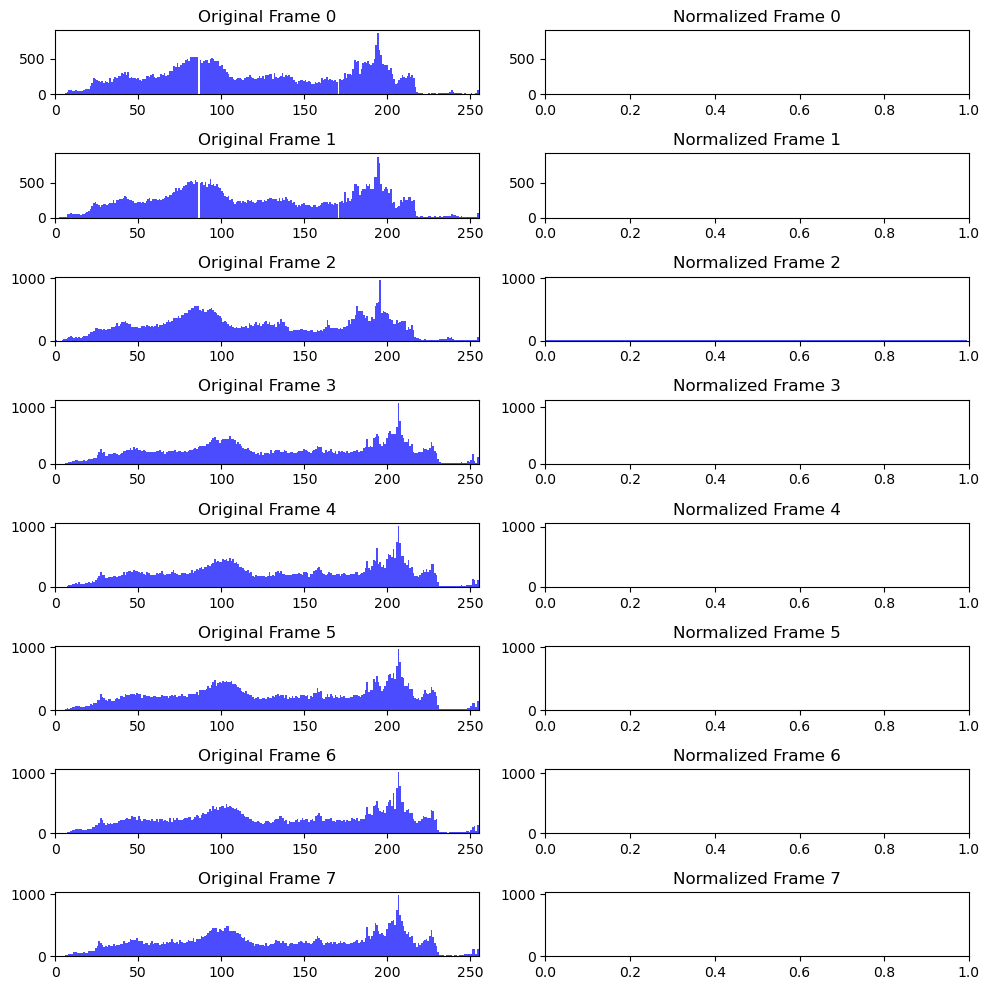

In [6]:
def plot_pixel_distributions(input_folder, num_images=8):
    fig, axs = plt.subplots(num_images, 2, figsize=(10, 10))
    
    for i, frame_file in enumerate(sorted(os.listdir(input_folder))[:num_images]):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)
        frame_array = np.array(frame)
        
        # Plot original pixel values
        axs[i, 0].hist(frame_array.ravel(), bins=256, color='blue', alpha=0.7)
        axs[i, 0].set_title(f"Original Frame {i}")
        axs[i, 0].set_xlim(0, 255)
        
        # Plot normalized pixel values
        normalized_frame_path = os.path.join(output_folder, frame_file)
        normalized_frame = Image.open(normalized_frame_path)
        normalized_frame_array = np.array(normalized_frame)
        
        axs[i, 1].hist(normalized_frame_array.ravel(), bins=256, color='blue', alpha=0.7)
        axs[i, 1].set_title(f"Normalized Frame {i}")
        axs[i, 1].set_xlim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Call the function to visualize pixel distribution comparison
plot_pixel_distributions(output_folder)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_histogram(image_array, output_path, frame_file):
    plt.hist(image_array.ravel(), bins=256, range=(0, 1), density=True)
    plt.title(f'Histogram of Frame: {frame_file}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.savefig(output_path)  # Save the histogram
    plt.close()

# Example usage:
image_path = r'C:\Users\HP\Desktop\MP\normalized_frames\16_frame0.jpg'  # Example image path
output_histogram_path = 'histogram_resized_frame_1.png'  # Output path for the histogram
frame_file = 'normalized.jpg'  # Frame name

# Load the image
image = Image.open(image_path)
image_array = np.array(image) / 255.0  # Normalize pixel values to range [0, 1]

# Generate histogram
generate_histogram(image_array, output_histogram_path, frame_file)

# Data Augmentation

In [8]:
import os
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def augment_frame(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for frame_file in sorted(os.listdir(input_folder)):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)

        # 1. Flipping the image
        flipped_frame = frame.transpose(Image.FLIP_LEFT_RIGHT)
        flipped_frame.save(os.path.join(output_folder, f'flipped_{frame_file}'))

        # 2. Rotating the image
        rotated_frame = frame.rotate(15)  # Rotate by 15 degrees
        rotated_frame.save(os.path.join(output_folder, f'rotated_{frame_file}'))

        # 3. Brightness adjustment
        enhancer = ImageEnhance.Brightness(frame)
        bright_frame = enhancer.enhance(1.5)  # Increase brightness by 1.5x
        bright_frame.save(os.path.join(output_folder, f'bright_{frame_file}'))

    print(f"Augmentation completed. Frames saved in {output_folder}.")

# Define input and output paths
input_folder = 'normalized_frames'  # Replace with your resized frames folder
output_folder = 'augmented_frames'  # Replace with your augmented frames folder

# Call the function to augment the frames
augment_frame(input_folder, output_folder)

Augmentation completed. Frames saved in augmented_frames.


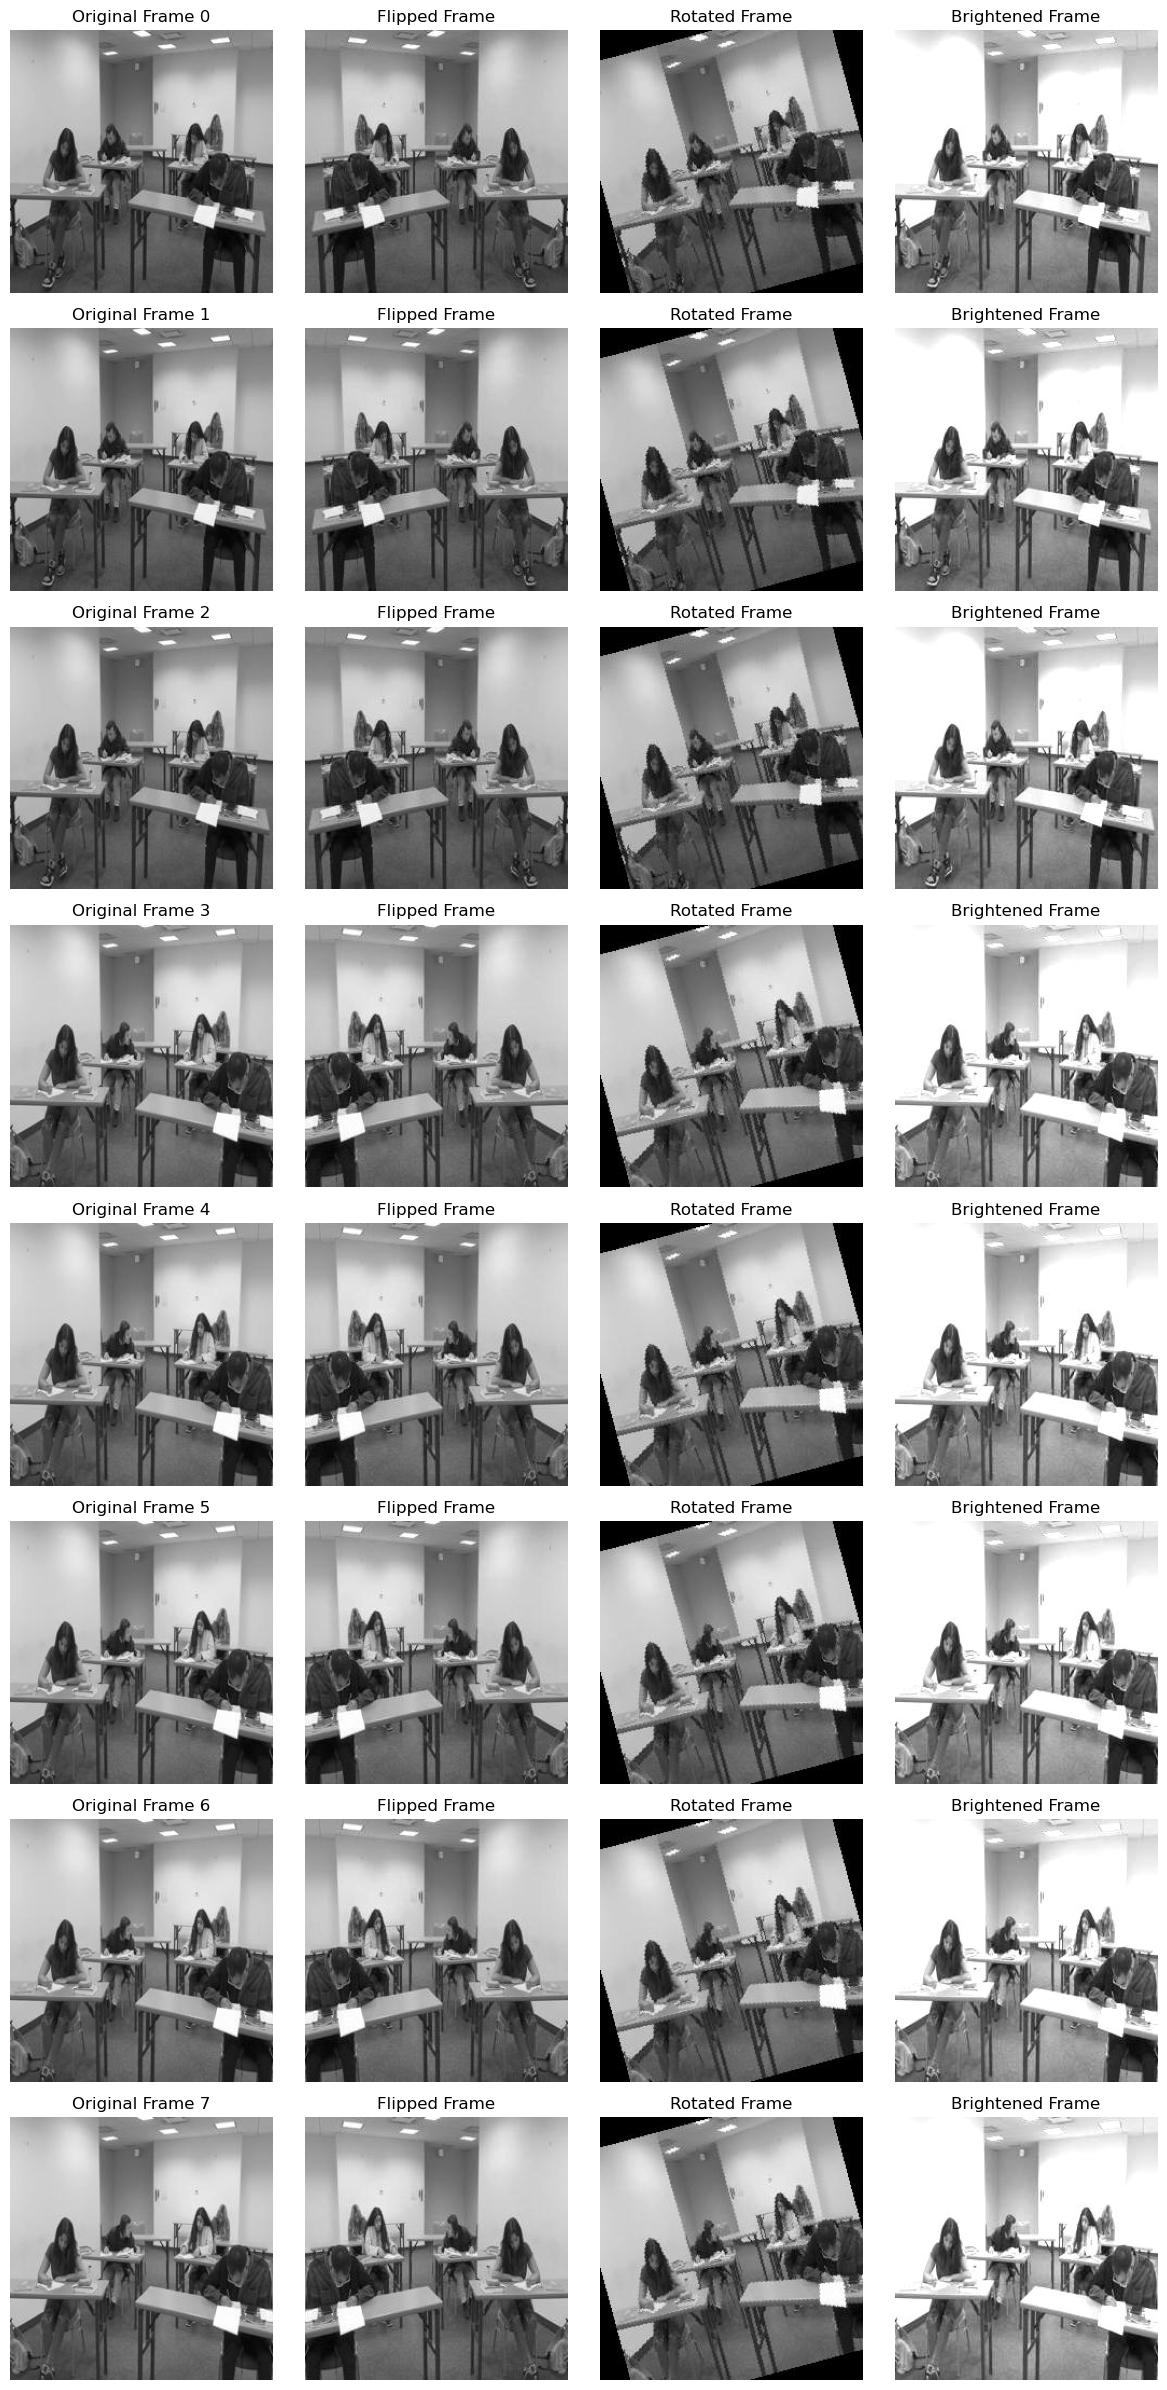

In [9]:
def display_augmentations(input_folder, output_folder, num_images=8):
    fig, axs = plt.subplots(num_images, 4, figsize=(12, num_images * 3))

    for i, frame_file in enumerate(sorted(os.listdir(input_folder))[:num_images]):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)

        # Original frame
        axs[i, 0].imshow(frame, cmap='gray')
        axs[i, 0].set_title(f"Original Frame {i}")
        axs[i, 0].axis('off')

        # Flipped frame
        flipped_frame_path = os.path.join(output_folder, f'flipped_{frame_file}')
        flipped_frame = Image.open(flipped_frame_path)
        axs[i, 1].imshow(flipped_frame, cmap='gray')
        axs[i, 1].set_title("Flipped Frame")
        axs[i, 1].axis('off')

        # Rotated frame
        rotated_frame_path = os.path.join(output_folder, f'rotated_{frame_file}')
        rotated_frame = Image.open(rotated_frame_path)
        axs[i, 2].imshow(rotated_frame, cmap='gray')
        axs[i, 2].set_title("Rotated Frame")
        axs[i, 2].axis('off')

        # Brightness adjusted frame
        bright_frame_path = os.path.join(output_folder, f'bright_{frame_file}')
        bright_frame = Image.open(bright_frame_path)
        axs[i, 3].imshow(bright_frame, cmap='gray')
        axs[i, 3].set_title("Brightened Frame")
        axs[i, 3].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize augmented frames
display_augmentations(input_folder, output_folder)

# Pipelining

In [6]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Define input and output directories
input_folder = 'Report'  # Replace with your input folder
output_folder = "Pipeline"  # Replace with your output folder
target_size = (128, 128)  # Desired frame size

# Frame Extraction
def extract_frames(video_path, output_folder, frame_rate=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    cap = cv2.VideoCapture(video_path)
    count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_rate == 0:
            cv2.imwrite(f'{output_folder}/frame_{count}.jpg', frame)  # Save the frame
        count += 1
    cap.release()

# Resizing & Grayscale Conversion & Normalization
def resize_and_grayscale(input_folder, output_folder, target_size):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for frame_file in sorted(os.listdir(input_folder)):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)
        
        # Convert to grayscale
        frame_gray = frame.convert('L')
        
        # Resize to target size
        frame_resized = frame_gray.resize(target_size)
        
        # Normalize pixel values
        frame_array = np.array(frame_resized) / 255.0
        
        output_frame_path = os.path.join(output_folder, frame_file)
        Image.fromarray((frame_array * 255).astype(np.uint8)).save(output_frame_path)  # Convert back to uint8 and save

# Data Augmentation
def data_augmentation(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for frame_file in sorted(os.listdir(input_folder)):
        frame_path = os.path.join(input_folder, frame_file)
        frame = Image.open(frame_path)
        
        # Rotation
        rotated_frame = frame.rotate(15)  # Rotate by 15 degrees
        rotated_frame.save(os.path.join(output_folder, f'rotated_{frame_file}'))
        
        # Brightness enhancement
        enhancer = ImageEnhance.Brightness(frame)
        bright_frame = enhancer.enhance(1.5)  # Increase brightness
        bright_frame.save(os.path.join(output_folder, f'bright_{frame_file}'))

# Main function to run the pipeline
def main():
    video_path = r'C:\Users\HP\Downloads\WhatsApp Video 2025-01-07 at 10.58.49 PM.mp4'  # Path to your video file
    frame_rate = 30
    
    extract_frames(video_path, input_folder, frame_rate)
    resize_and_grayscale(input_folder, output_folder, target_size)
    data_augmentation(output_folder, output_folder)
    
    print("Preprocessing completed. Frames saved in", output_folder)

if __name__ == "__main__":
    main()

Preprocessing completed. Frames saved in Pipeline
